<a href="https://colab.research.google.com/github/PedroSalomaoR/desafio-calculo-de-metrica/blob/main/matriz_de_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [65]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [66]:
logdir = 'log'

In [67]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes =[0,1,2,3,4,5,6,7,8,9]

In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8894 - loss: 0.3565 - val_accuracy: 0.9834 - val_loss: 0.0546
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9849 - loss: 0.0480 - val_accuracy: 0.9870 - val_loss: 0.0381
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9911 - val_loss: 0.0302
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9899 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9892 - val_loss: 0.0362


In [71]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [72]:
classes = [0,1,2,3,4,5,6,7,8,9]

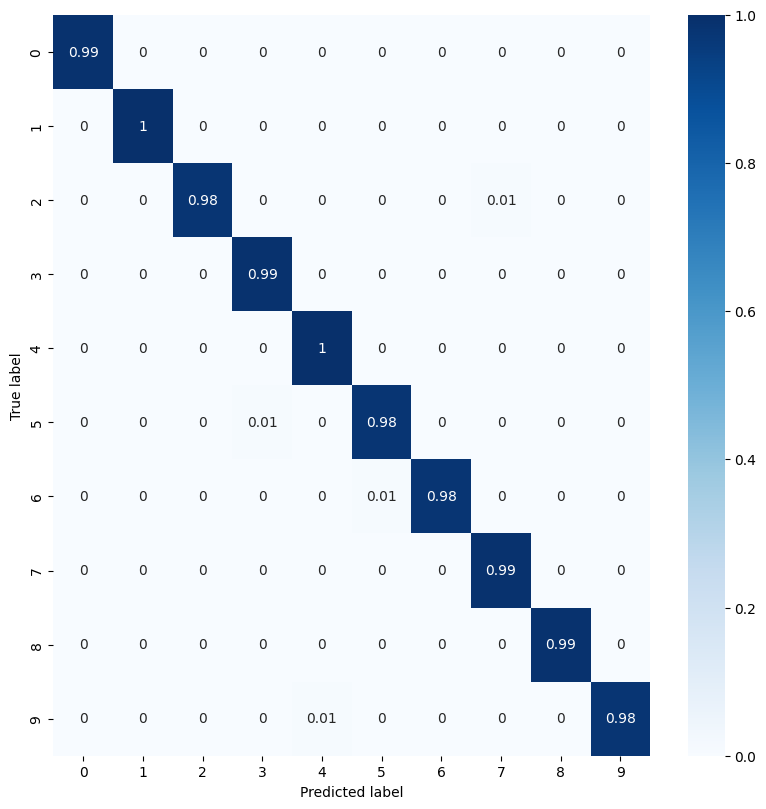

In [73]:
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
print(con_mat_df)

      0    1     2     3     4     5     6     7     8     9
0  0.99  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
1  0.00  1.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
2  0.00  0.0  0.98  0.00  0.00  0.00  0.00  0.01  0.00  0.00
3  0.00  0.0  0.00  0.99  0.00  0.00  0.00  0.00  0.00  0.00
4  0.00  0.0  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00
5  0.00  0.0  0.00  0.01  0.00  0.98  0.00  0.00  0.00  0.00
6  0.00  0.0  0.00  0.00  0.00  0.01  0.98  0.00  0.00  0.00
7  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.99  0.00  0.00
8  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.99  0.00
9  0.00  0.0  0.00  0.00  0.01  0.00  0.00  0.00  0.00  0.98


In [75]:
total = np.sum(con_mat)
VP = np.diag(con_mat)
FN = np.sum(con_mat, axis=1) - VP
FP = np.sum(con_mat, axis=0) - VP
VN = total - (VP + FN + FP)

for i in range(len(VP)):
    print(f"Classe {i}: VP={VP[i]}, VN={VN[i]}, FP={FP[i]}, FN={FN[i]}")

Classe 0: VP=975, VN=9013, FP=7, FN=5
Classe 1: VP=1134, VN=8852, FP=13, FN=1
Classe 2: VP=1015, VN=8962, FP=6, FN=17
Classe 3: VP=1000, VN=8975, FP=15, FN=10
Classe 4: VP=980, VN=9010, FP=8, FN=2
Classe 5: VP=872, VN=9099, FP=9, FN=20
Classe 6: VP=943, VN=9038, FP=4, FN=15
Classe 7: VP=1016, VN=8949, FP=23, FN=12
Classe 8: VP=969, VN=9013, FP=13, FN=5
Classe 9: VP=988, VN=8981, FP=10, FN=21


Acurácia: 0.9892
Sensibilidade (Recall): 0.9889907931211258
Especificidade: 0.998798626474976
Precisão: 0.9892951165160808
F-Score: 0.9891212526946307


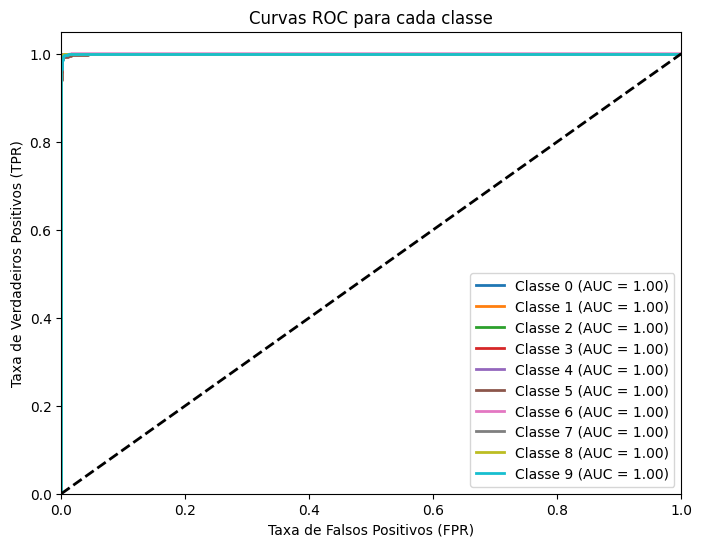

In [77]:
print(f"Acurácia: {np.sum(VP) / total}")
print(f"Sensibilidade (Recall): {np.mean(VP / (VP + FN))}")
print(f"Especificidade: {np.mean(VN / (VN + FP))}")
print(f"Precisão: {np.mean(VP / (VP + FP))}")
print(f"F-Score: {np.mean(2 * (VP / (VP + FP)) * (VP / (VP + FN)) / ((VP / (VP + FP)) + (VP / (VP + FN))))}")

y_true_bin = label_binarize(y_true, classes=classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC para cada classe')
plt.legend(loc="lower right")
plt.show()